Accuracy: 0.8804347826086957
           Feature    Importance
10        ST_Slope  1.615942e-01
4      Cholesterol  2.264493e-02
2    ChestPainType  2.228261e-02
5        FastingBS  2.065217e-02
3        RestingBP  1.503623e-02
8   ExerciseAngina  1.394928e-02
9          Oldpeak  1.340580e-02
1              Sex  1.195652e-02
7            MaxHR  1.105072e-02
6       RestingECG  1.110223e-17
0              Age -1.105072e-02


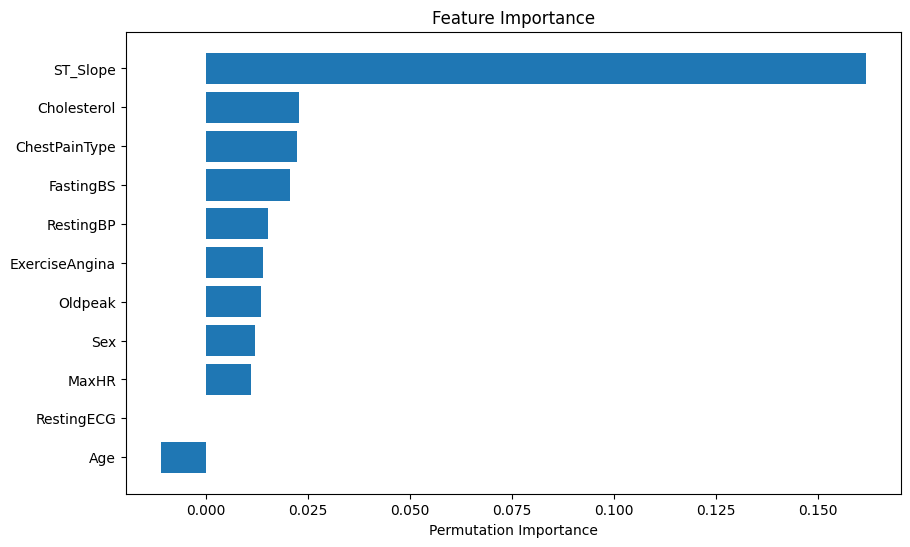

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('./dataset/heart.csv')

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']


# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize and Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_scaled)
X_test_normalized = scaler.transform(X_test_scaled)

# Step 6: Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Step 7: Train the model
model.fit(X_train_normalized, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 9: Compute permutation importance
perm_importance = permutation_importance(model, X_test_normalized, y_test, n_repeats=30, random_state=42)

# Step 10: Create a dataframe to display the importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Step 11: Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


Accuracy: 0.8804347826086957
           Feature    Importance
10        ST_Slope  1.615942e-01
4      Cholesterol  2.264493e-02
2    ChestPainType  2.228261e-02
5        FastingBS  2.065217e-02
3        RestingBP  1.503623e-02
8   ExerciseAngina  1.394928e-02
9          Oldpeak  1.340580e-02
1              Sex  1.195652e-02
7            MaxHR  1.105072e-02
6       RestingECG  1.110223e-17
0              Age -1.105072e-02


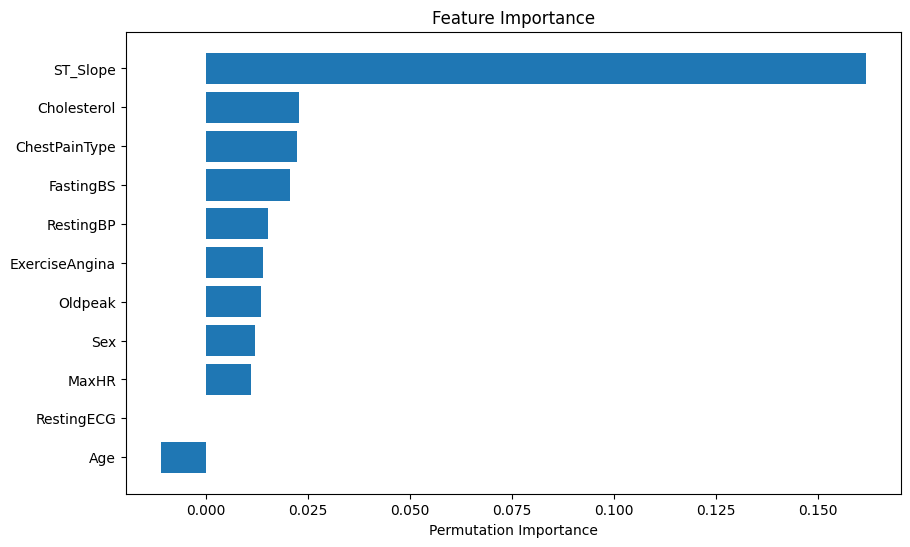

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('./dataset/heart.csv')

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize and Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_scaled)
X_test_normalized = scaler.transform(X_test_scaled)

# Step 6: Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Step 7: Train the model
model.fit(X_train_normalized, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 9: Compute permutation importance
perm_importance = permutation_importance(model, X_test_normalized, y_test, n_repeats=30, random_state=42)

# Step 10: Create a dataframe to display the importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Step 11: Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Step 1: Load the dataset
data = pd.read_csv('./dataset/heart.csv')

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features (X) and target variable (y)
X_test = data.drop('HeartDisease', axis=1)
y_test = data['HeartDisease']

# Reshape input data for LSTM model
X_test_lstm = np.reshape(X_test.to_numpy(), (X_test.shape[0], 1, X_test.shape[1]))

# Reshape input data for GRU model
X_test_gru = np.reshape(X_test.to_numpy(), (X_test.shape[0], 1, X_test.shape[1]))

# Reshape input data for SimpleRNN model
X_test_simple_rnn = np.reshape(X_test.to_numpy(), (X_test.shape[0], 1, X_test.shape[1]))

# Load saved models
ann_model = load_model('./models/ANN.h5')
gru_model = load_model('./models/GRU.h5')
lstm_model = load_model('./models/LSTM.h5')
mlp_model = load_model('./models/MLP.h5')
simple_rnn_model = load_model('./models/SimpleRNN.h5')
y_pred_probs = ann_model.predict(X)
y_pred = np.round(y_pred_probs).astype(int)
ann_accuracy = accuracy_score(y, y_pred)
print("ANN Accuracy:", ann_accuracy)
gru_preds = gru_model.predict(X_test_gru)
lstm_preds = lstm_model.predict(X_test_lstm)
mlp_preds = mlp_model.predict(X_test)
simple_rnn_preds = simple_rnn_model.predict(X_test_simple_rnn)

# Combine predictions (e.g., averaging)
ensemble_preds = (ann_preds + gru_preds + lstm_preds + mlp_preds + simple_rnn_preds) / 5

# Evaluate ensemble performance
ensemble_accuracy = accuracy_score(y_test, np.argmax(ensemble_preds, axis=1))
print("Ensemble Accuracy:", ensemble_accuracy)

# Evaluate accuracy for each model

gru_accuracy = accuracy_score(y_test, np.argmax(gru_preds, axis=1))
lstm_accuracy = accuracy_score(y_test, np.argmax(lstm_preds, axis=1))
mlp_accuracy = accuracy_score(y_test, np.argmax(mlp_preds, axis=1))
simple_rnn_accuracy = accuracy_score(y_test, np.argmax(simple_rnn_preds, axis=1))

# Print individual accuracies
print("ANN Accuracy:", ann_accuracy)
print("GRU Accuracy:", gru_accuracy)
print("LSTM Accuracy:", lstm_accuracy)
print("MLP Accuracy:", mlp_accuracy)
print("SimpleRNN Accuracy:", simple_rnn_accuracy)


29/29 [==============================] - 0s 2ms/step
ANN Accuracy: 0.4106753812636166
29/29 [==============================] - 0s 2ms/step
Ensemble Accuracy: 0.4335511982570806
ANN Accuracy: 0.4106753812636166
GRU Accuracy: 0.4466230936819172
LSTM Accuracy: 0.4466230936819172
MLP Accuracy: 0.4335511982570806
SimpleRNN Accuracy: 0.4466230936819172
